# Feature Transformation
## Feature Scaling
1. Normalization<br>
    a. Min Max Scaling<br>
    b. Mean Normalization <br>
    c. Max Absolute Scaling <br>
    d. Robust Scaling <br>

# Min Max Scaling

In [55]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

In [56]:
df = pd.read_csv('wine_data.csv', usecols=[0,1,2])
df.columns = ["Class Label", "Alcohol","Malic acid"]
df

,Class Label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


In [57]:
df.value_counts()

Class Label  Alcohol  Malic acid
1            12.85    1.60          1
2            12.21    1.19          1
             12.64    1.36          1
             12.67    0.98          1
             12.69    1.53          1
                                   ..
             11.46    3.74          1
             11.56    2.05          1
             11.61    1.35          1
             11.62    1.99          1
3            14.34    1.68          1
Name: count, Length: 177, dtype: int64

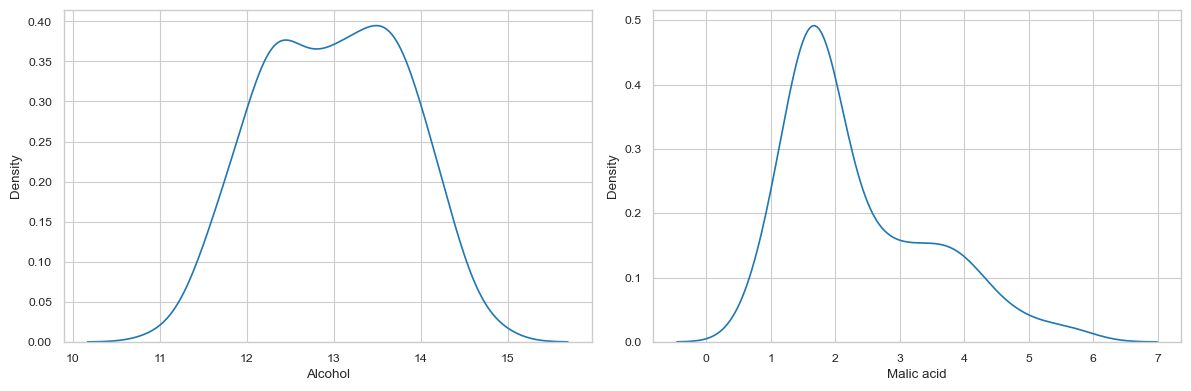

In [58]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
sns.kdeplot(data=df['Alcohol'],ax=ax1)
sns.kdeplot(data=df['Malic acid'],ax=ax2)

fig.tight_layout()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

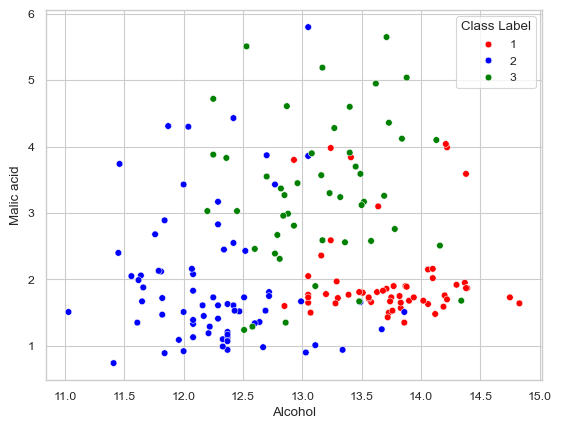

In [59]:
color_dict = {1: "red", 2:"blue",3:"green"} # r, b, and y can be passed as well. 
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class Label'],palette=color_dict)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

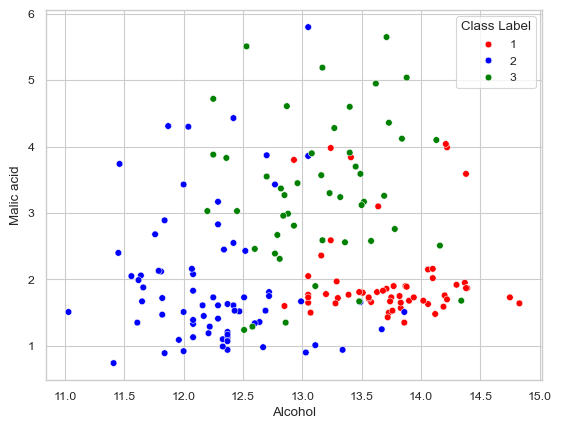

In [60]:

# Set the style and context
# sns.set_style('whitegrid')  # Change 'whitegrid' to any other style you prefer

sns.set_context('paper')  # Change 'paper' to 'talk', 'poster', etc. for different contexts

color_dict = {1: "red", 2:"blue",3:"green"} # r, b, and y can be passed as well.

sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class Label'],palette=color_dict)

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Class Label",axis=1), df['Class Label'], test_size= 0.3, random_state=3)

In [62]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

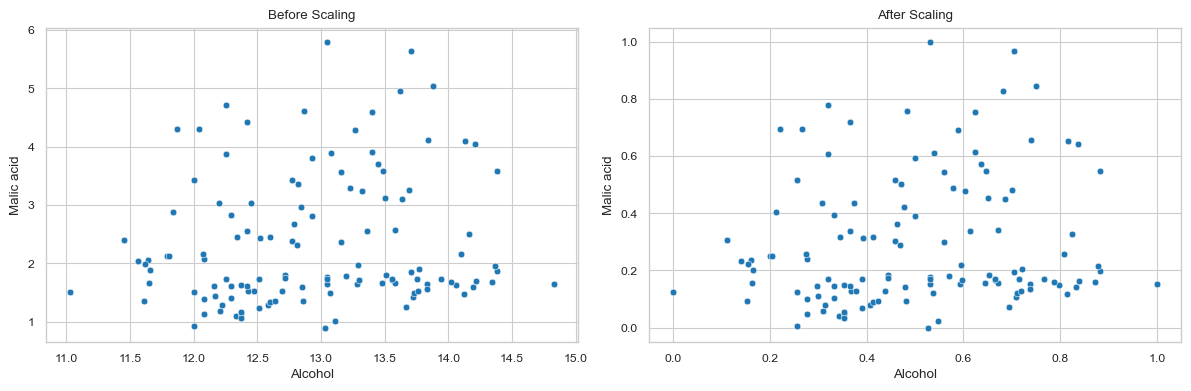

In [68]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.set_title("Before Scaling")
sns.scatterplot(data=X_train,x='Alcohol',y='Malic acid',ax=ax1)

ax2.set_title("After Scaling")
sns.scatterplot(data=X_train_scaled,x='Alcohol',y='Malic acid',ax=ax2)

fig.tight_layout()

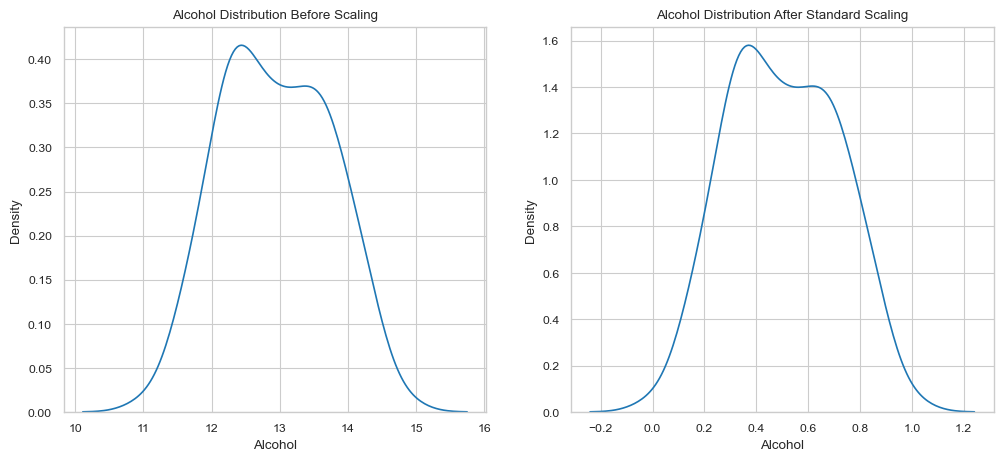

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

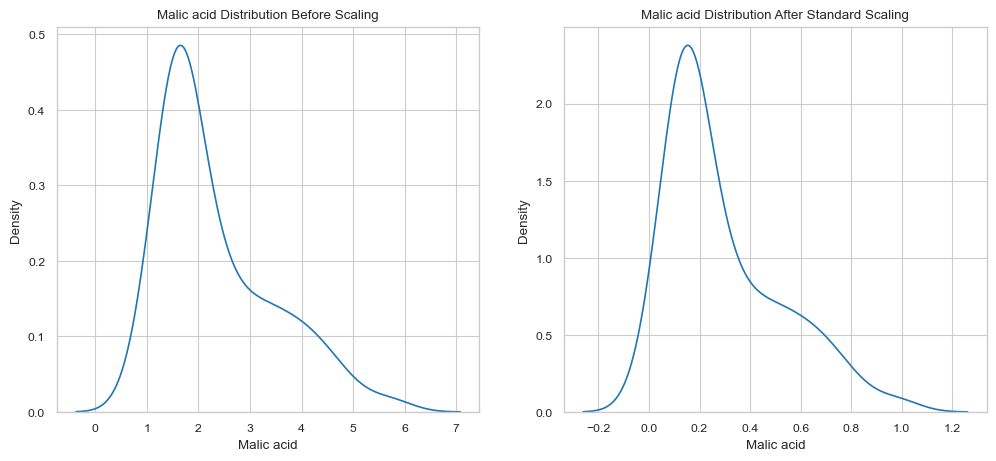

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()